# log plots

In [81]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import math

In [82]:
df1 = pd.read_csv("C:/Users/rabbi/Jupyter Stuff\year2/extendo_project/prelim_tap2.csv")

In [158]:
h = 0.292
L = 1.673
dh = 0.003    ## uncertainty in h
dL = 0.004     ## uncertainty in l
dd_m = 0.00015   ## the uncertainty in the d measurement, i dont know what it is just guessing 2mm. (apparently +- 0.4mm)
y = 633 * 10**-9   ## laser wavelength

In [159]:
def wavenum(x):
    k = (h * (x*10**-3) * np.pi)/(y*(h**2+L**2))
    return k

In [160]:
def unc_k(d,h,l,A,B,C):     ## defining a function to calculate the error in k due to measurements
    dh = (-d*((h**2)-(L**2))/((h**2)+(l**2))**2)*A
    dl = ((-2*d*h*l)/((l**2+h**2)**2))*B
    dd = (h/((l**2)+(h**2)))*C
    return (np.pi/(633*10**-9))*(dh+dl+dd)

In [161]:
def ang_freq(f):
    w = 2*np.pi*f
    return w

In [162]:
df1["K (1/m)"] = wavenum(df1["d_avg/mm"])
df1["W (hz)"] = ang_freq(df1["frequency"])
df1["lnK"] = np.log(df1["K (1/m)"])
df1["lnW"] = np.log(df1["W (hz)"])
df1.head(5)

,frequency,d_avg/mm,K (1/m),W (hz),lnK,lnW
0,110,5.20,2612.811262,691.150384,7.868182,6.538357
1,120,4.86,2441.973602,753.982237,7.800562,6.625369
2,130,4.29,2155.569291,816.814090,7.675810,6.705412
3,140,4.60,2311.333039,879.645943,7.745580,6.779519
4,150,5.14,2582.663439,942.477796,7.856576,6.848512


In [163]:
dferr = pd.DataFrame(df1["K (1/m)"], columns=["unc_k (1/m)"]) 
dferr["unc_k (1/m)"] = unc_k(df1["d_avg/mm"]*10**-3,h,L,dh,dL,dd_m)
dferr["ln(unc_k)"] = np.log(dferr["unc_k (1/m)"])
dferr["err_k"] = dferr["unc_k (1/m)"]/df1["K (1/m)"]
dferr.head(5)

,unc_k (1/m),ln(unc_k),err_k
0,88.501695,4.483022,0.033872
1,87.643055,4.473272,0.035890
2,86.203571,4.456712,0.039991
3,86.986448,4.465752,0.037635
4,88.350171,4.481308,0.034209


In [164]:
def line(m,x,c):
    y = m * x + c
    return y

In [165]:
def theory(x):
    y = 3/2 * x - 4.76
    return y

In [166]:
somek = np.linspace(7.6, 8, 11)
expected = theory(somek)

In [167]:
vbf, var = curve_fit(line, df1["lnK"],df1["lnW"],absolute_sigma=True)

x = vbf[0]
c = vbf[1] 

err_x = np.sqrt(var[0][0])
err_c = np.sqrt(var[1][1])

print("x = {0:3.4f} +/- {2:3.4f} , c = {1:3.4f} +/- {3:3.4f}".format(x,c,err_x,err_c))

x = 1.4557 +/- 2.6823 , c = -4.5919 +/- 21.1638


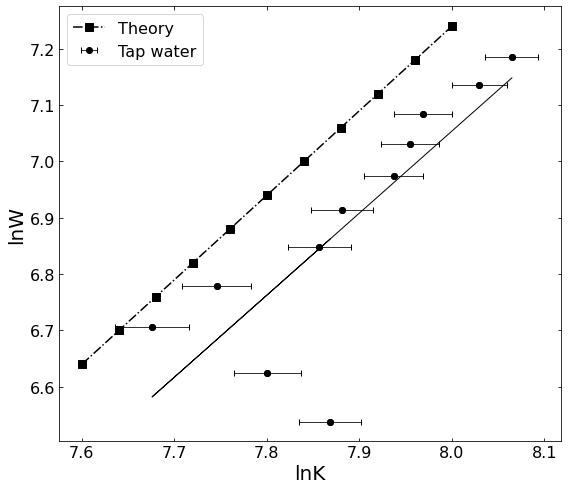

In [168]:
plt.rcParams['font.size'] = '16'

fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(1,1,1)

ax.plot(df1['lnK'],df1["lnW"],'k.',markersize=12)

ax.set_ylabel('lnW',fontsize=20)
ax.set_xlabel('lnK',fontsize=20)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")

eb1 = plt.errorbar(df1["lnK"],df1["lnW"],xerr = dferr["err_k"],color='k',marker='o',lw=0.8,
                   capsize=3,linestyle = "none", label = "Tap water")


ax.plot(df1['lnK'], line(df1['lnK'], *vbf), "k-", lw = 1)  # using vbf to plot the trendline
ax.plot(somek, expected, "k-.s", markersize = 8, label = "Theory")  # using vbf to plot the trendline

#ax.plot(somek, expected, "k-.s", markersize = 8,markeredgecolor='black', markerfacecolor='none')

ax.legend()
plt.show()

In [169]:
def surft(i):
    return 997.7*np.exp(2*i)

In [170]:
def unc_surft(A,B):
    return 2*A*B

In [171]:
surf = surft(c)
err_surft = unc_surft(surf,err_c)
print("The surface tension of tap water is: ({0:2.3f} +- {1:2.3f}) mN/m".format(surf*1000,err_surft*1000))

The surface tension of tap water is: (102.458 +- 4336.826) mN/m


# now for all the code

In [172]:
df_r = pd.read_csv("C:/Users/rabbi/Jupyter Stuff\year2/extendo_project/water_ripples.csv")
#df_water.dropna(inplace = True)
df_r.head()

,frequency,water,salt,oil,fairy,toothpaste
0,110,5.20,4.61,NaN,5.13,5.50
1,120,4.86,5.31,NaN,5.90,5.75
2,130,4.29,5.23,NaN,6.33,6.21
3,140,4.60,5.45,NaN,6.55,6.38
4,150,5.14,5.72,NaN,7.00,6.75


In [173]:
dfw = pd.DataFrame(df_r["water"], columns=["water"])
dfs = pd.DataFrame(df_r["salt"], columns=["salt"]) 
dff = pd.DataFrame(df_r["fairy"], columns=["fairy"]) 
dft = pd.DataFrame(df_r["toothpaste"], columns=["toothpaste"]) 

In [174]:
df_r["W (hz)"] = ang_freq(df_r["frequency"])
df_r["lnW"] = np.log(df_r["W (hz)"])

dfw["K (1/m)"] = wavenum(df_r["water"])
dfw["lnK"] = np.log(dfw["K (1/m)"])
dfw["lnW"] = df_r["lnW"]

dfs["K (1/m)"] = wavenum(df_r["salt"])
dfs["lnK"] = np.log(dfs["K (1/m)"])
dfs["lnW"] = df_r["lnW"]

dff["K (1/m)"] = wavenum(df_r["fairy"])
dff["lnK"] = np.log(dff["K (1/m)"])
dff["lnW"] = df_r["lnW"]

dft["K (1/m)"] = wavenum(df_r["toothpaste"])
dft["lnK"] = np.log(dft["K (1/m)"])
dft["lnW"] = df_r["lnW"]

In [175]:
dfw["unc_k"] = unc_k(df_r["water"]*10**-3,h,L,dh,dL,dd_m)
dfs["unc_k"] = unc_k(df_r["water"]*10**-3,h,L,dh,dL,dd_m)
dff["unc_k"] = unc_k(df_r["water"]*10**-3,h,L,dh,dL,dd_m)
dft["unc_k"] = unc_k(df_r["water"]*10**-3,h,L,dh,dL,dd_m)

dfw["err_k"] = dfw["unc_k"]/dfw["K (1/m)"]
dfs["err_k"] = dfs["unc_k"]/dfs["K (1/m)"]
dff["err_k"] = dff["unc_k"]/dff["K (1/m)"]
dft["err_k"] = dft["unc_k"]/dft["K (1/m)"]

In [176]:
vbfw, varw = curve_fit(line, dfw["lnK"],dfw["lnW"])

xw = vbfw[0]
cw = vbfw[1] 

err_xw = np.sqrt(varw[0][0])
err_cw = np.sqrt(varw[1][1])

In [177]:
vbfs, var_s = curve_fit(line, dfs["lnK"],dfs["lnW"])

xs = vbfs[0]
cs = vbfs[1] 

err_xs = np.sqrt(var_s[0][0])
err_cs = np.sqrt(var_s[1][1])

In [178]:
vbff, varf = curve_fit(line, dff["lnK"],dff["lnW"])

xf = vbff[0]
cf = vbff[1] 

err_xf = np.sqrt(varf[0][0])
err_cf = np.sqrt(varf[1][1])

In [179]:
vbft, vart = curve_fit(line, dft["lnK"],dft["lnW"])

xt = vbft[0]
ct = vbft[1] 

err_xt = np.sqrt(vart[0][0])
err_ct = np.sqrt(vart[1][1])

In [183]:
print("For water: x = {0:3.2f} +/- {2:3.2f} , c = {1:3.4f} +/- {3:3.4f}".format(xw,cw,err_xw*2,err_cw))
print("For salt water: x = {0:3.3f} +/- {2:3.3f} , c = {1:3.4f} +/- {3:3.4f}".format(xs,cs,err_xs*2,err_cs))
print("For soap water: x = {0:3.3f} +/- {2:3.3f} , c = {1:3.4f} +/- {3:3.4f}".format(xf,cf,err_xf*2,err_cf))
print("For toothpaste water: x = {0:3.3f} +/- {2:3.3f} , c = {1:3.4f} +/- {3:3.4f}".format(xt,ct,err_xt*2,err_ct))

For water: x = 1.46 +/- 0.72 , c = -4.5919 +/- 2.8222
For salt water: x = 1.486 +/- 0.179 , c = -5.0005 +/- 0.7183
For soap water: x = 1.232 +/- 0.097 , c = -3.1922 +/- 0.3979
For toothpaste water: x = 1.398 +/- 0.091 , c = -4.5209 +/- 0.3737


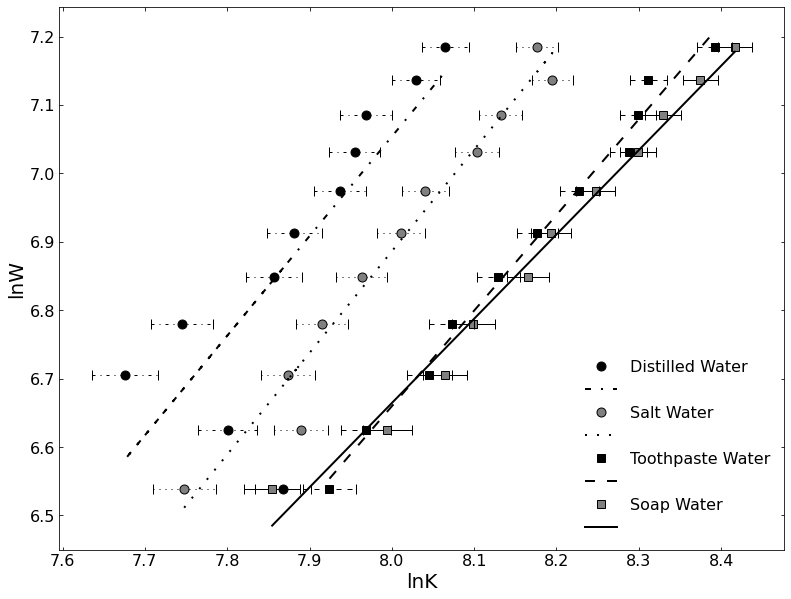

In [181]:
plt.rcParams['font.size'] = '16'

fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(1,1,1)


ax.plot(dfw['lnK'],dfw["lnW"],"o", markersize = 9, markerfacecolor='black', markeredgecolor='black',label = "Distilled Water")
ax.plot(dfw['lnK'], line(dfw['lnK'], *vbfw), linestyle = (0, (3, 5, 1, 5)), color = "black", lw = 2, label = " ")  # using vbf to plot the trendline

ax.plot(dfs['lnK'],dfs["lnW"],'o',markersize = 9, markerfacecolor='grey', markeredgecolor='black', label = "Salt Water")
ax.plot(dfs['lnK'], line(dfs['lnK'], *vbfs), linestyle = (0, (1, 5)), color = "black", lw = 2, label = " ")  # using vbf to plot the trendline

ax.plot(dft['lnK'],dft["lnW"],'s',markersize = 8, markerfacecolor='black', markeredgecolor='black', label = "Toothpaste Water")
ax.plot(dft['lnK'], line(dft['lnK'], *vbft), linestyle = (0, (5, 6)), color = "black", lw = 2, label = " ")  # using vbf to plot the trendline

ax.plot(dff['lnK'],dff["lnW"],'s', markersize = 8, markerfacecolor='grey', markeredgecolor='black', label = "Soap Water")
ax.plot(dff['lnK'], line(dff['lnK'], *vbff), linestyle = "-", color = "black", lw = 2, label = " ")  # using vbf to plot the trendline


eb1 = plt.errorbar(dfw["lnK"],dfw["lnW"],xerr = dfw["err_k"],color='k',lw=1,
                   capsize=5,linestyle = "none")
eb1[-1][0].set_linestyle((0, (3, 5, 1, 5)))
eb1 = plt.errorbar(dfs["lnK"],dfs["lnW"],xerr = dfs["err_k"],color='k',lw=1,
                   capsize=5,linestyle = "none")
eb1[-1][0].set_linestyle((0, (1, 5)))
eb1 = plt.errorbar(dft["lnK"],dft["lnW"],xerr = dft["err_k"],color='k',lw=1,
                   capsize=5,linestyle = "none")
eb1[-1][0].set_linestyle((0, (5, 6)))
eb1 = plt.errorbar(dff["lnK"],dff["lnW"],xerr = dff["err_k"],color='k',lw=1,
                   capsize=5,linestyle = "none")
eb1[-1][0].set_linestyle('-')
    
ax.set_ylabel('lnW',fontsize=20)
ax.set_xlabel('lnK',fontsize=20)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.tick_params(axis="y", direction="in")
ax.tick_params(axis="x", direction="in")


#ax.plot(somek, expected, "k-.s", markersize = 8, label = "Pure Water Theory")  # using vbf to plot the trendline
#ax.plot(somek, expected, "k-.s", markersize = 8,markeredgecolor='black', markerfacecolor='none')

ax.legend(loc = "lower right",frameon=False)
plt.savefig("Dispersion_relation")
plt.show()

In [182]:
surftw = surft(cw)
surfts = surft(cs)
surftf = surft(cf)
surftt = surft(ct)

err_surftw = unc_surft(surftw,err_cw)
err_surfts = unc_surft(surfts,err_cs)
err_surftf = unc_surft(surftf,err_cf)
err_surftt = unc_surft(surftt,err_ct)

print("The surface tension of water is: ({0:2.3f} +- {1:2.3f}) mN/m".format(surftw*1000,err_surftw*1000))
print("The surface tension of salt water is: ({0:2.3f} +- {1:2.3f}) mN/m".format(surfts*1000,err_surfts*1000))
print("The surface tension of soapy water is: ({0:2.3f} +- {1:2.3f}) mN/m".format(surftf*1000,err_surftf*1000))
print("The surface tension of toothpaste water is: ({0:2.3f} +- {1:2.3f}) mN/m".format(surftt*1000,err_surftt*1000))

The surface tension of water is: (102.458 +- 578.319) mN/m
The surface tension of salt water is: (45.253 +- 65.006) mN/m
The surface tension of soapy water is: (1683.652 +- 1339.743) mN/m
The surface tension of toothpaste water is: (118.079 +- 88.246) mN/m


# explaining why i did this

In the other file i have already made plots of $\omega^{2}$ against $k^{3}$ which has given me some decent looking values for the surface tensions. However plotting the data in that way does nothing in the way of testing if the dispersion relation used is actually valid, Those plots only allow us get some values. So to test whether our data actually fits to the theoretical prediction i used some log plots. This is because the dispersion relation, $\omega^{2} = \frac{\gamma}{\rho}k^{3}$, should show a relationship such as,
$$ ln(\omega) = \frac{3}{2}ln(k) + \frac{1}{2}ln(\frac{\gamma}{\rho}),$$
which is shows a linear relationship with a gradient of $\frac{3}{2}$. To show that use of this dispersion relation is valid we must show that a log plot of our data would give us a gradient of $\frac{3}{2}$, which is roughly the case for: pure water, salt water and toothpaste water. For some reason this relation does a poor job at predicting what happens with soap water.

However plotting like this allows random errors to play a large part in determining the surface tension (cannot actually tell you why the values are so off) so it is probably a good idea to use the other file containing plots of $\omega^{2}$ against $k^{3}$ to actually take values for the surface tension.

I have also included another file which demonstrates the limit in which we can use our reduced dispersion relation, i have explained slightly more in that file.

### I kindly ask that you change some of the formatting for the graphs before you use them in any report